In [23]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/yaedin/twitter-disaster/main/raw/disaster_tweets.csv')
print(data.info())
print('----------------')
print(f"target column unique = {data.target.unique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
----------------
target column unique = [1 0]


In [24]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)

In [25]:
train.drop('id', axis=1, inplace=True)
train.drop('keyword', axis=1, inplace=True)
train.drop('location', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)
test.drop('keyword', axis=1, inplace=True)
test.drop('location', axis=1, inplace=True)

print(train.info())
print(test.info())
print("train df:")
print(train['target'].value_counts(normalize=True) * 100)
print("test df:")
print(test['target'].value_counts(normalize=True) * 100)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6090 entries, 3055 to 7000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6090 non-null   object
 1   target  6090 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 142.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1523 entries, 6826 to 2687
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1523 non-null   object
 1   target  1523 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 35.7+ KB
None
train df:
0    56.945813
1    43.054187
Name: target, dtype: float64
test df:
0    57.386737
1    42.613263
Name: target, dtype: float64


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
def clean_text(text):
  # get rid of all unwanted punctuation and digits
  text = text.replace("´", "'")
  digi_punct = "[^a-zA-Z' ]"
  text = re.sub(digi_punct, " ", text)
  text = " ".join(text.split())
  text = text.lower()
  return text
import re
train["text_clean"] = train["text"].apply(clean_text)
display(train.head())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,text,target,text_clean
3055,There has not been 1 real tear out of #Shelli ...,0,there has not been real tear out of shelli 's ...
3616,EXCLUSIVE: In 179 fatalities involving on-duty...,1,exclusive in fatalities involving on duty nypd...
2265,@valdes1978 forgive me if I was a bit testy. H...,0,valdes forgive me if i was a bit testy have be...
1233,Video: Fire burns two apartment buildings and...,1,video fire burns two apartment buildings and b...
1079,When you get a bomb ass picture mail ????????,0,when you get a bomb ass picture mail


In [27]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
my_stopwords = stopwords.words("english")
train["wo_stopwords"] = train["text"].apply(
    lambda text: " ".join([word for word in text.split() if word not in my_stopwords])
)
train.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,target,text_clean,wo_stopwords
3055,There has not been 1 real tear out of #Shelli ...,0,there has not been real tear out of shelli 's ...,There 1 real tear #Shelli 's eyes entire episo...
3616,EXCLUSIVE: In 179 fatalities involving on-duty...,1,exclusive in fatalities involving on duty nypd...,EXCLUSIVE: In 179 fatalities involving on-duty...
2265,@valdes1978 forgive me if I was a bit testy. H...,0,valdes forgive me if i was a bit testy have be...,@valdes1978 forgive I bit testy. Have deluged ...
1233,Video: Fire burns two apartment buildings and...,1,video fire burns two apartment buildings and b...,Video: Fire burns two apartment buildings blow...
1079,When you get a bomb ass picture mail ????????,0,when you get a bomb ass picture mail,When get bomb ass picture mail ????????


In [28]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
train["lemmatized"] = train["wo_stopwords"].apply(
  lambda text: " ".join([lemmatizer.lemmatize(word) for word in text.split()])
)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [29]:
test.head()

,text,target
6826,I feel like that episode of Victorious when th...,0
7339,Wildfire Burns On California U.s. China Econom...,1
3849,that new lil b x chance is nothing but flames,0
4983,Hat #russian soviet army kgb military #cossac...,0
5562,Landslide in Italian Alps kills three: ROME (R...,1


In [30]:
#for further use it makes sense to define train and test data for vectorization
X_train = train['lemmatized']
y_train = train['target']
X_test = test['text']
y_test = test['target']

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

pipeline1 = make_pipeline(CountVectorizer(), LogisticRegression())
pipeline2 = make_pipeline(TfidfVectorizer(), LogisticRegression())

print("CountVectorizer training data", cross_val_score(pipeline1, X_train, y_train, scoring='f1').mean())
print("TfidfVectorizer training data", cross_val_score(pipeline2, X_train, y_train, scoring='f1').mean())

CountVectorizer training data 0.7463666967648168
TfidfVectorizer training data 0.7325979968539705


In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

pipeline1 = make_pipeline(CountVectorizer(), LogisticRegression())
pipeline2 = make_pipeline(TfidfVectorizer(), LogisticRegression())

print("CountVectorizer testing data", cross_val_score(pipeline1, X_test, y_test, scoring='f1').mean())
print("TfidfVectorizer testing data", cross_val_score(pipeline2, X_test, y_test, scoring='f1').mean())

CountVectorizer testing data 0.6973333581332404
TfidfVectorizer testing data 0.6854452245645097


In [34]:
text = []
text.append("fire california")
text

['fire california']

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_fit = vectorizer.fit_transform(X_train)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_fit, y_train)
X_test_fit = vectorizer.transform(X_test)
textpred = vectorizer.transform(text)
y_pred = logreg.predict(textpred)
y_pred

array([1])

In [36]:
def test(tweet):
    text = []
    text.append(tweet)
    textpred = vectorizer.transform(text)
    y_pred = logreg.predict(textpred)
    print(y_pred)

In [37]:
test('in california is sunshine')

[1]


In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_fit, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
X_test_fit = vectorizer.transform(X_test)
y_pred = logreg.predict(X_test_fit)

In [40]:
model_score = logreg.score(X_train_fit, y_train)

In [41]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

77.15036112934996

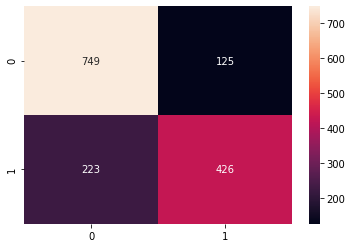

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="")